In [1]:
import os
import pandas as pd
import timm
import numpy as np
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

c:\Users\firmi\TFE\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Step 1: Prepare dataset
image_folder = '../../../tfe_data/Building_images'
print(os.listdir(image_folder))
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]

# Create a DataFrame with correct column name 'path'
metadata = pd.DataFrame({'path': image_paths})

# Define enhanced transformations with data augmentation and black and white conversion
transform = T.Compose([
    T.Resize([384, 384]),
    T.Grayscale(num_output_channels=3),
    T.RandomRotation(10),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    T.ToTensor(),
    T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Add a dummy 'identity' column for compatibility
metadata['identity'] = range(len(metadata))

# Create the dataset
dataset = WildlifeDataset(metadata, transform=transform)

['a1.1.JPG', 'a10.1.jpg', 'a11.1.jpg', 'a12.1.jpg', 'a13.1.jpg', 'a13.2.JPG', 'a14.1.JPG', 'a15.1.JPG', 'a16.1.JPG', 'a17.1.JPG', 'a17.2.JPG', 'a18.1.JPG', 'a18.2.JPG', 'a19.1.JPG', 'a2.1.jpg', 'a2.2.jpg', 'a2.3.JPG', 'a20.1.JPG', 'a3.1.jpg', 'a3.2.JPG', 'a3.3.JPG', 'a3.4.jpg', 'a4.1.jpg', 'a4.2.jpg', 'a5.1.jpg', 'a6.1.jpg', 'a6.2.JPG', 'a6.3.JPG', 'a7.1.jpg', 'a8.1.jpg', 'a8.2.JPG', 'a8.3.jpg', 'a8.4.jpg', 'a9.1.jpg']


In [7]:
# Load the MegaDescriptor-L-384 model
model_name = 'hf-hub:BVRA/MegaDescriptor-L-384'
extractor = DeepFeatures(timm.create_model(model_name, num_classes=0, pretrained=True))
print("model loaded successfully")

# Extract features
features = extractor(dataset)


model loaded successfully


100%|████████████████████████████████████████████████████████████████| 1/1 [01:58<00:00, 118.62s/it]


In [8]:
# Calculate similarity
similarity_function = CosineSimilarity()
similarity_dict = similarity_function(features, features)

# Access the actual similarity values
similarity_matrix = similarity_dict['cosine']

Image 0 (a1.1.JPG) is similar to:


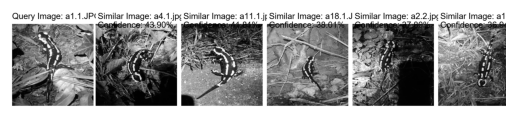

Image 1 (a10.1.jpg) is similar to:


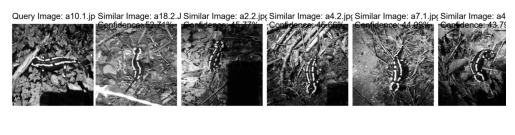

Image 2 (a11.1.jpg) is similar to:


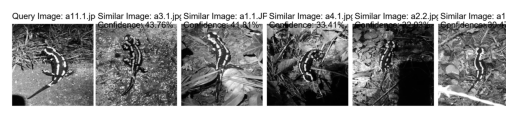

Image 3 (a12.1.jpg) is similar to:


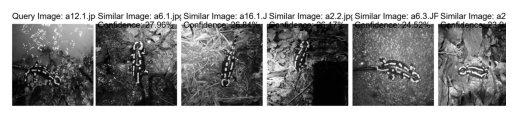

Image 4 (a13.1.jpg) is similar to:


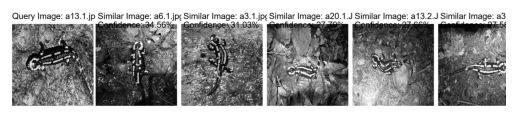

Image 5 (a13.2.JPG) is similar to:


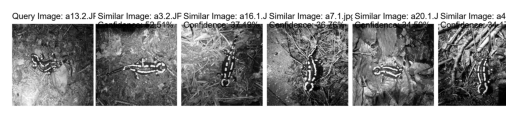

Image 6 (a14.1.JPG) is similar to:


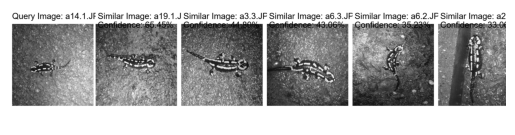

Image 7 (a15.1.JPG) is similar to:


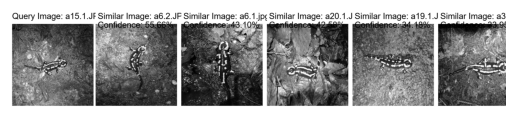

Image 8 (a16.1.JPG) is similar to:


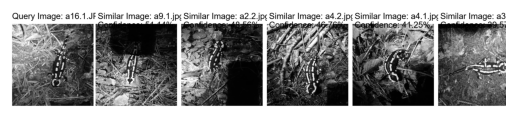

Image 9 (a17.1.JPG) is similar to:


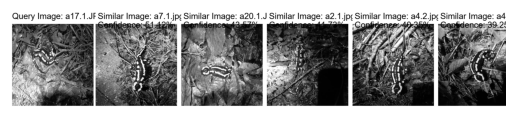

Image 10 (a17.2.JPG) is similar to:


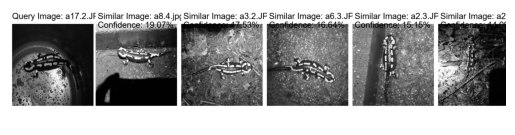

Image 11 (a18.1.JPG) is similar to:


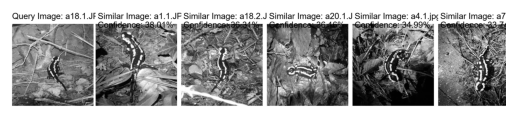

Image 12 (a18.2.JPG) is similar to:


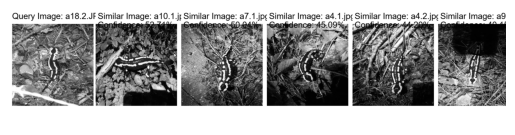

Image 13 (a19.1.JPG) is similar to:


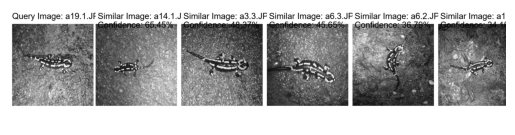

Image 14 (a2.1.jpg) is similar to:


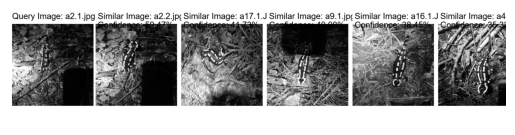

Image 15 (a2.2.jpg) is similar to:


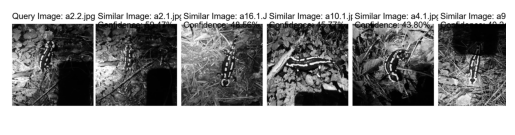

Image 16 (a2.3.JPG) is similar to:


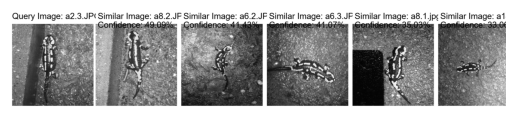

Image 17 (a20.1.JPG) is similar to:


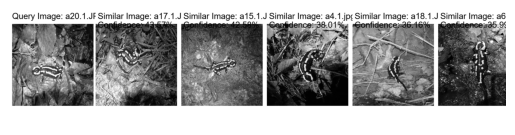

Image 18 (a3.1.jpg) is similar to:


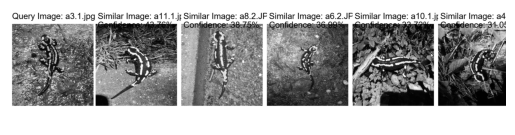

Image 19 (a3.2.JPG) is similar to:


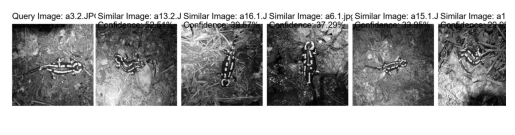

Image 20 (a3.3.JPG) is similar to:


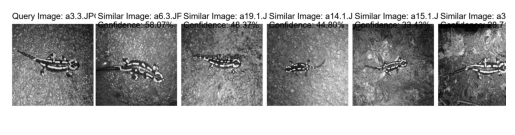

Image 21 (a3.4.jpg) is similar to:


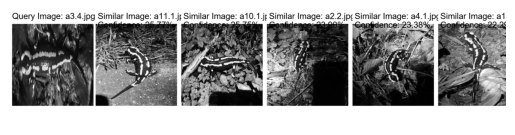

Image 22 (a4.1.jpg) is similar to:


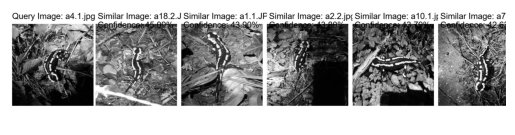

Image 23 (a4.2.jpg) is similar to:


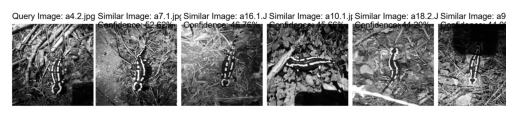

Image 24 (a5.1.jpg) is similar to:


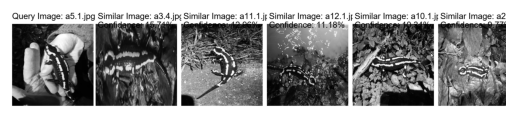

Image 25 (a6.1.jpg) is similar to:


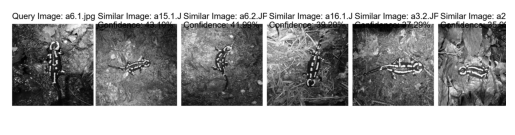

Image 26 (a6.2.JPG) is similar to:


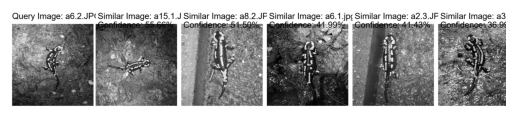

Image 27 (a6.3.JPG) is similar to:


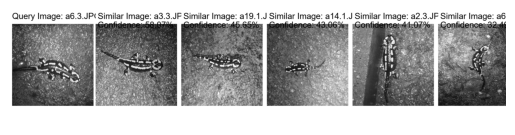

Image 28 (a7.1.jpg) is similar to:


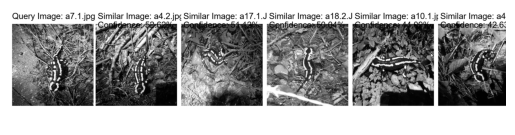

Image 29 (a8.1.jpg) is similar to:


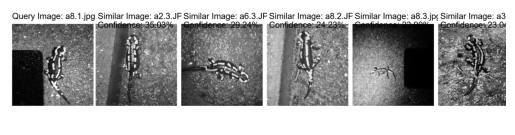

Image 30 (a8.2.JPG) is similar to:


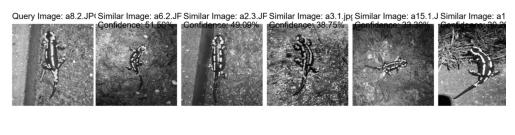

Image 31 (a8.3.jpg) is similar to:


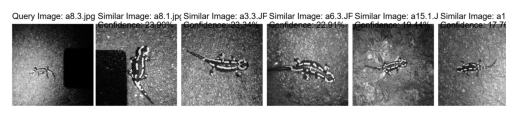

Image 32 (a8.4.jpg) is similar to:


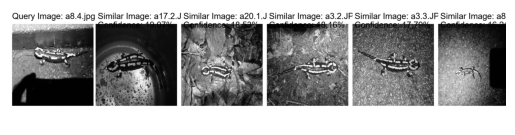

Image 33 (a9.1.jpg) is similar to:


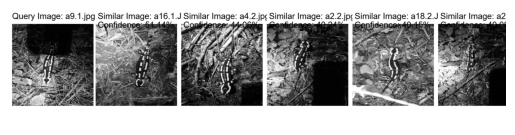

In [10]:
# Function to get top N similar images with similarity scores
def get_top_n_similar_with_scores(similarity_matrix, n=5):
    top_n_indices = np.argsort(-similarity_matrix, axis=1)[:, 1:n+1]
    top_n_scores = -np.sort(-similarity_matrix, axis=1)[:, 1:n+1]
    return top_n_indices, top_n_scores

# Get top 5 similar images for each image
top_5_similar, top_5_scores = get_top_n_similar_with_scores(similarity_matrix, n=5)

# Display results with images and similarity scores
for idx, (similar_indices, scores) in enumerate(zip(top_5_similar, top_5_scores)):
    print(f"Image {idx} ({os.path.basename(metadata['path'][idx])}) is similar to:")
    query_img = Image.open(metadata['path'][idx]).convert("L").convert("RGB").resize((384, 384))  # Convert to black and white and back to RGB
    
    # Create a new image for the results with more space
    result_img = Image.new('RGB', (2340, 484 + 60), (255, 255, 255))  # Adjust width for spacing and height for text
    
    # Draw the query image details with background
    draw = ImageDraw.Draw(result_img)
    font = ImageFont.truetype("arial.ttf", 40)  # Larger font size
    draw.rectangle([(0, 0), (2340, 60)], fill="white")
    draw.text((10, 10), f"Query Image: {os.path.basename(metadata['path'][idx])}", fill="black", font=font)
    result_img.paste(query_img, (10, 70))  # Add padding
    
    for i, (similar_idx, score) in enumerate(zip(similar_indices, scores)):
        similar_img = Image.open(metadata['path'][similar_idx]).convert("L").convert("RGB").resize((384, 384))  # Convert to black and white and back to RGB
        result_img.paste(similar_img, ((i + 1) * 384 + 20 * (i + 1), 70))  # Add more spacing between images
        draw.rectangle([((i + 1) * 384 + 20 * (i + 1), 0), ((i + 2) * 384 + 20 * (i + 1), 60)], fill="white")
        draw.text(((i + 1) * 384 + 20 * (i + 1) + 10, 10), f"Similar Image: {os.path.basename(metadata['path'][similar_idx])}\nConfidence: {score*100:.2f}%", fill="black", font=font)
    
    # Display the aggregated result image
    plt.imshow(result_img)
    plt.axis('off')
    plt.show()
